In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt


# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
from   IPython.display                 import display
from   pylab                           import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [7, 5]

C:\Users\lavan\AppData\Local\Temp\ipykernel_27028\2241885588.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\lavan\AppData\Local\Temp\ipykernel_27028\2241885588.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## Q.1 Read the data as an appropriate Time Series data and plot the data.

# a) Read the data

In [2]:
df = pd.read_csv(r"C:\Users\lavan\Downloads\Rose.csv")

In [3]:
#Check data types
df.dtypes

YearMonth     object
Rose         float64
dtype: object

Year-Month column is not seen as a date object

In [4]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df = pd.read_csv(r"C:\Users\lavan\Downloads\Rose.csv", parse_dates = ['YearMonth'])

In [5]:
#Check data types
df.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

Now the time series reference is approprately identified.

In [6]:
#It is recommended that we make our time series reference as the index
df = pd.read_csv(r"C:\Users\lavan\Downloads\Rose.csv", parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [7]:
#Check data types
df.dtypes

Rose    float64
dtype: object

In [8]:

df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


## Q.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [9]:
print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  187 
The number of columns:  1


In [10]:
# Check the frequency of the time series
frequency = pd.infer_freq(df.index)

# Print the frequency
print("Time Series Frequency:", frequency)


Time Series Frequency: MS


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [12]:
total_missing_values = df.isna().sum()
print("Total Missing Values:")
print(total_missing_values)


Total Missing Values:
Rose    2
dtype: int64


In [13]:
# Identify missing years and months based on the 'Rose' column
missing_years_months = df[df['Rose'].isna()].index.strftime('%Y-%m')

# Print the years and months with missing values
print("Years and Months with Missing Values:")
print(missing_years_months)

Years and Months with Missing Values:
Index(['1994-07', '1994-08'], dtype='object', name='YearMonth')


The rows with missing values in the 'Rose' column are associated with the months of July (07) and August (08) in the year 1994.



In [14]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


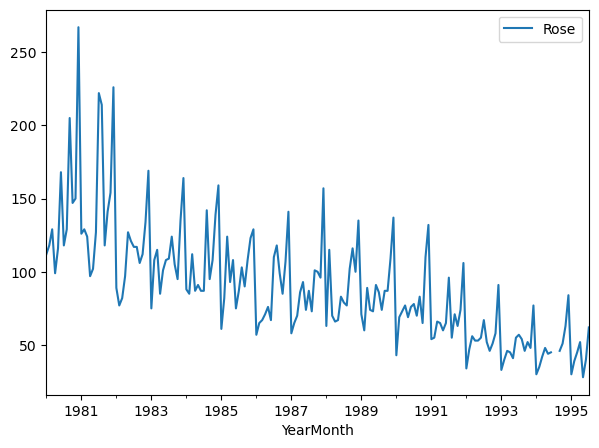

In [15]:
#Plot the time series
df.plot()
plt.show()

In [16]:
# Interpolate missing values in 'Rose' column
df['Rose'] = df['Rose'].interpolate()

# Check if there are any remaining missing values
total_missing = df['Rose'].isnull().sum()
print(f'Total Missing Values after Interpolation: {total_missing}')


Total Missing Values after Interpolation: 0


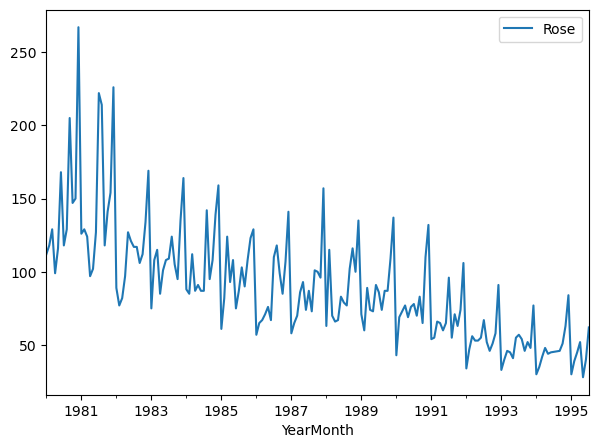

In [17]:
# Plot the time series
df.plot(figsize=(7, 5))
plt.show()


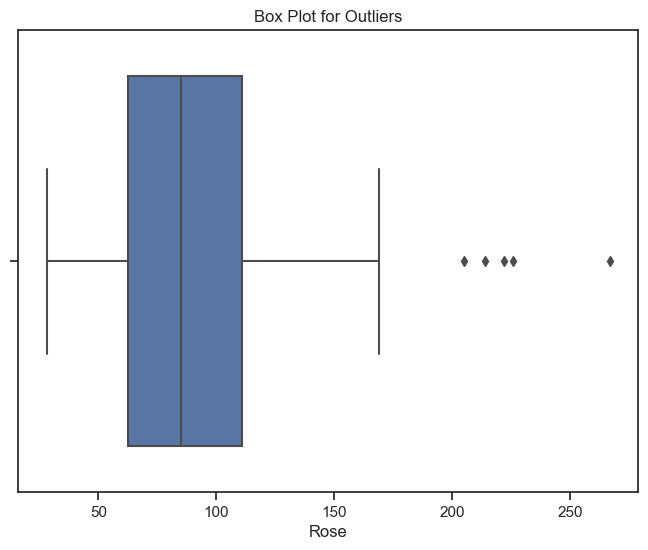

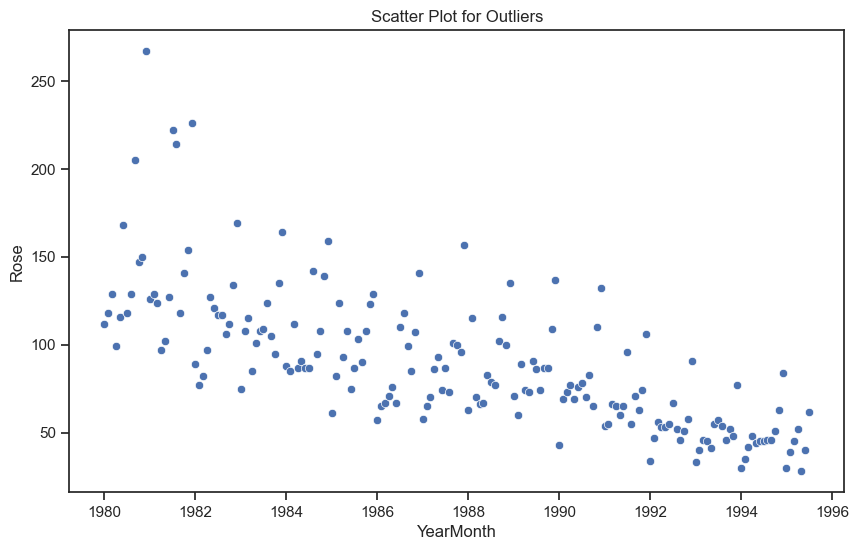

Outliers:
             Rose
YearMonth        
1980-12-01  267.0
1981-07-01  222.0
1981-08-01  214.0
1981-12-01  226.0


In [173]:
# Box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rose'])
plt.title('Box Plot for Outliers')
plt.show()

# Scatter plot for visualizing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='Rose', data=df)
plt.title('Scatter Plot for Outliers')
plt.show()

# Z-score to identify outliers
from scipy.stats import zscore

z_scores = zscore(df['Rose'])
outliers = (z_scores > 3) | (z_scores < -3)
outliers_df = df[outliers]
print('Outliers:')
print(outliers_df)


Insights for the provided outliers in the 'Rose' variable:

1. Outlier Identification:
   - Outliers in the 'Rose' variable are observed in December 1980, July 1981, August 1981, and December 1981.

2. Potential Seasonal Pattern:
   - The presence of outliers in December across different years (1980 and 1981) may suggest a potential seasonal pattern or unique characteristics associated with the 'Rose' variable during those specific months.

3. Further Investigation:
   - Further investigation is recommended to understand the specific factors contributing to these outliers. Consider exploring whether these anomalies align with known events, holidays, or other external influences. Additionally, assess whether the outliers represent consistent patterns or isolated incidents in those particular months.

Analyzing the context surrounding these outliers will provide a more comprehensive understanding of their significance and potential impact on the 'Rose' variable.

## Empirical Cumulative Distribution Function

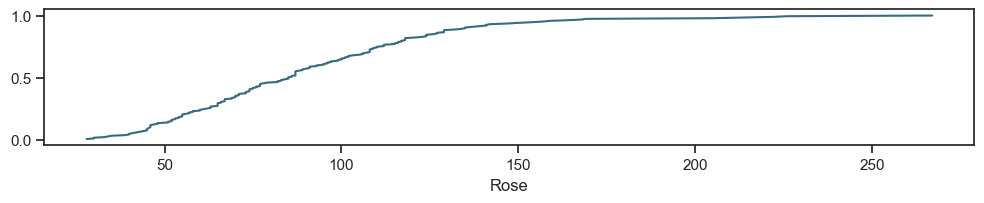

In [18]:
# Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Rose');

## Yearly and Monthly Boxplots

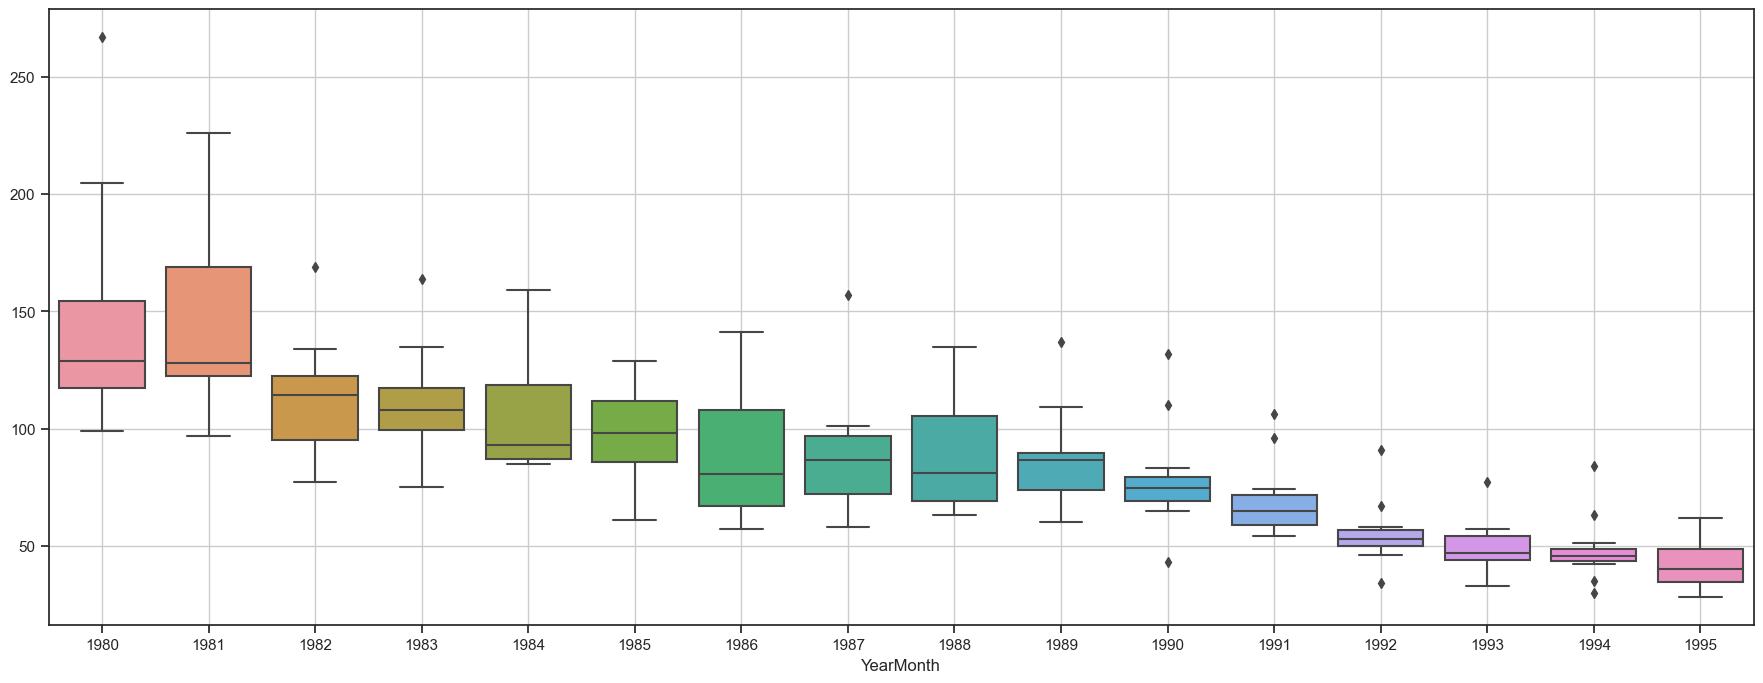

In [19]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

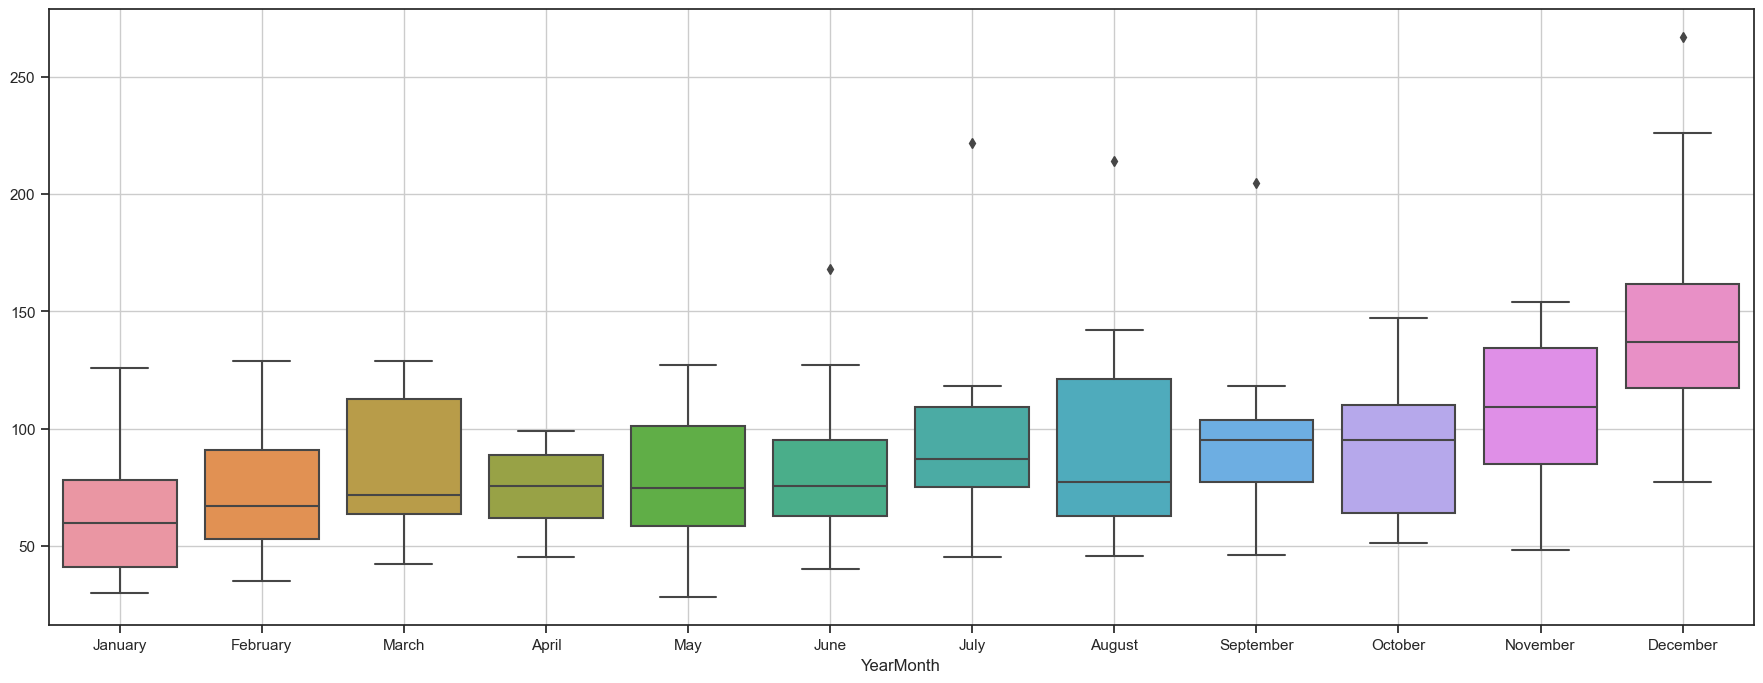

In [20]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

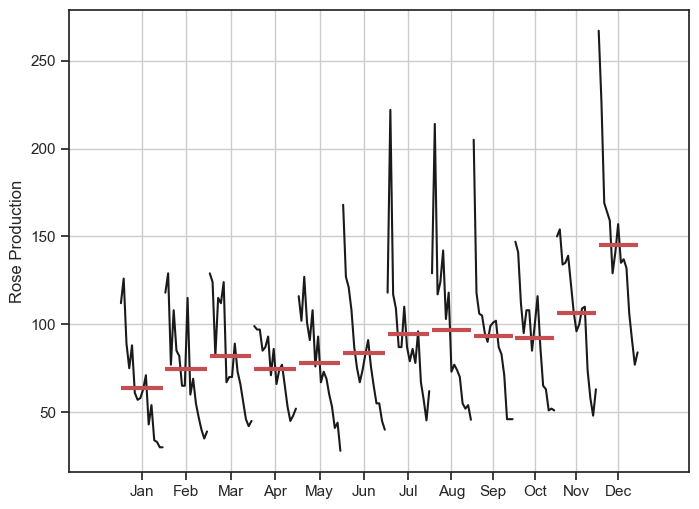

In [21]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(8,6))

month_plot(df,ylabel='Rose Production',ax=ax)
plt.grid();

*Performing the decomposition of data as there is an existence of seasonality and splitting the data accordingly.* Observing how number of wine sold vary on a month on month basis. A stacked plot for every year will give us a clear pattern of any seasonality over the many years and those changes will be clearly reflected in the plots.

In [186]:
monthly_sales_across_months = pd.pivot_table(df, values='Rose', columns=df.index.year, index=df.index.month)
monthly_sales_across_months

YearMonth,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
YearMonth,,,,,,,,,,,,,,,,
1,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.000000,30.0
2,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.000000,39.0
3,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.000000,45.0
4,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.000000,52.0
5,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.000000,28.0
6,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.000000,40.0
7,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,45.333333,62.0
8,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,45.666667,NaN
9,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.000000,NaN


<Axes: xlabel='YearMonth'>

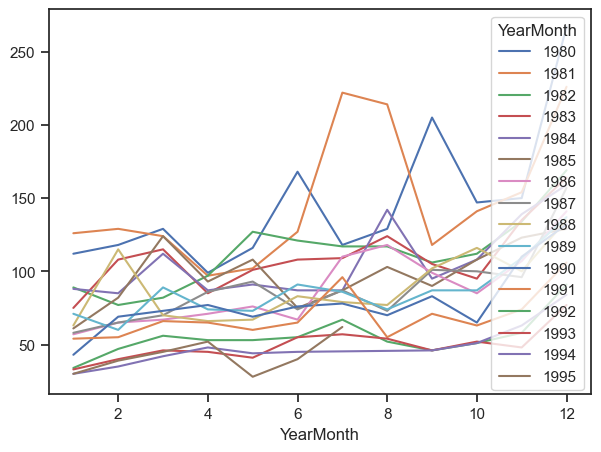

In [178]:
monthly_sales_across_months.plot()

<Axes: >

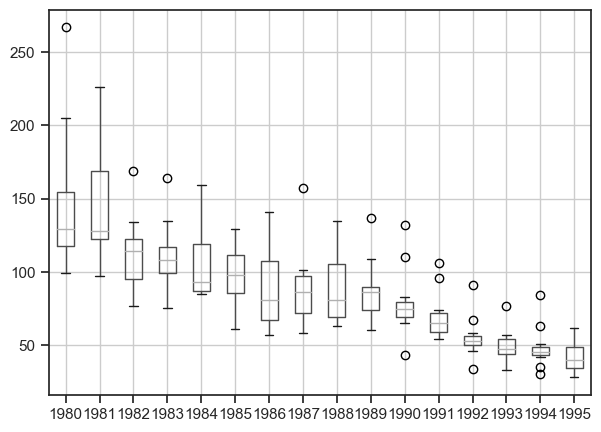

In [187]:
monthly_sales_across_months.boxplot()

In [24]:
yearly_sales_across_months = pd.pivot_table(df, values = 'Rose', columns = df.index.month, 
                                        index = df.index.year)

yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


<Axes: xlabel='YearMonth'>

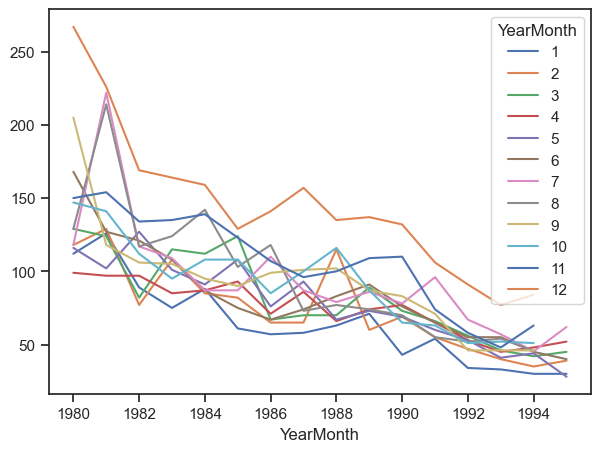

In [25]:
yearly_sales_across_months.plot()

<Axes: >

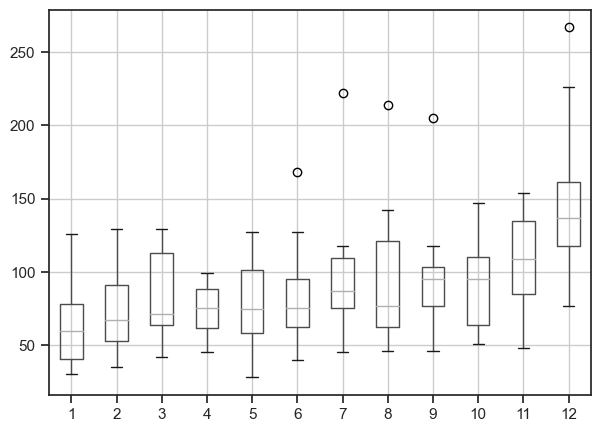

In [174]:
yearly_sales_across_months.boxplot()

## Downsampling

In [26]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


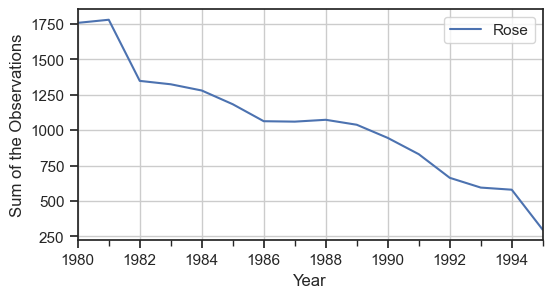

In [27]:
df_yearly_sum.plot(figsize=(6, 3))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Sum of the Observations')
plt.show()


In [28]:
#Let's change the monthly series to quarterly. This would require aggregation.
df_q = df.resample('Q').mean()

<Axes: xlabel='YearMonth'>

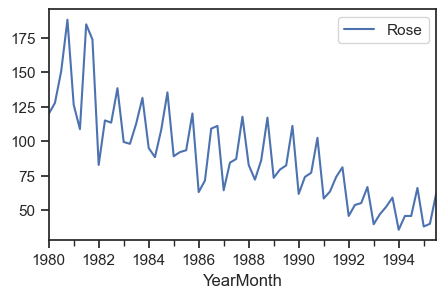

In [29]:
df_q.plot(figsize=(5, 3))


## Upsampling

In [32]:
#Let's change the monthly series to daily. 
df1_d = df.resample('D').ffill()
df1_d.head()


,Rose
YearMonth,
1980-01-01,112.0
1980-01-02,112.0
1980-01-03,112.0
1980-01-04,112.0
1980-01-05,112.0


<Axes: xlabel='YearMonth'>

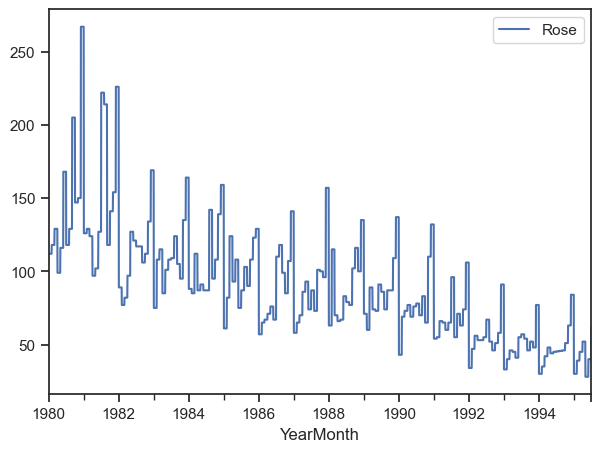

In [33]:
df1_d.plot()

## Decomposition

In [34]:
#Decompose the time series additively
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

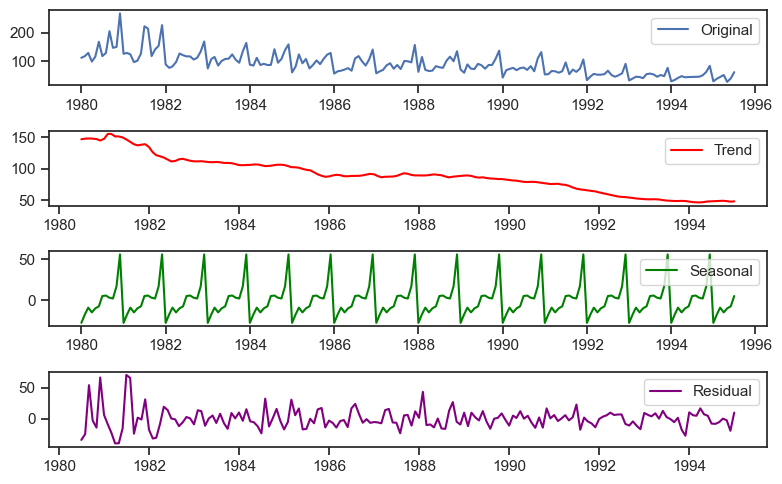

In [35]:
plt.figure(figsize=(8, 5))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df.index, df, label='Original')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(df_add_decompose.trend, label='Trend', color='red')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(df_add_decompose.seasonal, label='Seasonal', color='green')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(df_add_decompose.resid, label='Residual', color='purple')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
trend = df_add_decompose.trend
seasonality = df_add_decompose.seasonal
residual = df_add_decompose.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.08
1980-08-01    148.12
1980-09-01    148.37
1980-10-01    148.08
1980-11-01    147.42
1980-12-01    145.12
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.91
1980-02-01   -17.44
1980-03-01    -9.29
1980-04-01   -15.10
1980-05-01   -10.20
1980-06-01    -7.68
1980-07-01     4.90
1980-08-01     5.50
1980-09-01     2.77
1980-10-01     1.87
1980-11-01    16.85
1980-12-01    55.71
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01      NaN
1980-04-01      NaN
1980-05-01      NaN
1980-06-01      NaN
1980-07-01   -33.98
1980-08-01   -24.62
1980-09-01    53.85
1980-10-01    -2.96
1980-11-01   -14.26
1980-12-01    66.16
Name: resid, dtype: float64 



In [39]:
#Decompose the time series multiplicative
df_mul_decompose = seasonal_decompose(df, model = 'multiplicative', period = 12)

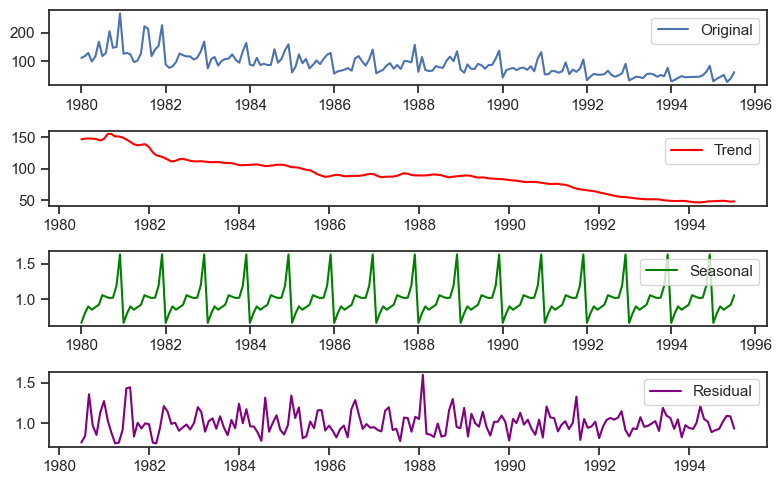

In [41]:
plt.figure(figsize=(8, 5))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df.index, df, label='Original')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(df_mul_decompose.trend, label='Trend', color='red')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(df_mul_decompose.seasonal, label='Seasonal', color='green')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(df_mul_decompose.resid, label='Residual', color='purple')
plt.legend()

plt.tight_layout()
plt.show()


Some of our key observations from this analysis:
Trend: 12-months MA is a fairly straight line indicating a downward linear trend.

Seasonality: seasonality of 12 months is clearly visible

Irregular Remainder (random): The multiplicative model not works as there are patterns in the residuals

In [42]:
trend_mul= df_mul_decompose.trend
seasonality_mul = df_mul_decompose.seasonal
residual_mul = df_mul_decompose.resid

print('Trend','\n',trend_mul.round(2).head(12),'\n')
print('Seasonality','\n',seasonality_mul.round(2).head(12),'\n')
print('Residual','\n',residual_mul.round(2).head(12),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.08
1980-08-01    148.12
1980-09-01    148.37
1980-10-01    148.08
1980-11-01    147.42
1980-12-01    145.12
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.67
1980-02-01    0.81
1980-03-01    0.90
1980-04-01    0.85
1980-05-01    0.89
1980-06-01    0.92
1980-07-01    1.06
1980-08-01    1.04
1980-09-01    1.02
1980-10-01    1.02
1980-11-01    1.19
1980-12-01    1.63
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01     NaN
1980-02-01     NaN
1980-03-01     NaN
1980-04-01     NaN
1980-05-01     NaN
1980-06-01     NaN
1980-07-01    0.76
1980-08-01    0.84
1980-09-01    1.36
1980-10-01    0.97
1980-11-01    0.85
1980-12-01    1.13
Name: resid, dtype: float64 



In [43]:
#1980-07-01    147.08 1980-07-01     1.06 1980-07-01   .76
##Since this is a multiplicative model:
#Observed = Trend*Seasonality*Irregular
147.08*1.06*.76


118.48764800000002

In [45]:
#Let's try to do log transformation
df_log = df.copy()

In [46]:
df_log['Rose'] = np.log(df)

In [47]:
df_log.Rose

YearMonth
1980-01-01    4.718499
1980-02-01    4.770685
1980-03-01    4.859812
1980-04-01    4.595120
1980-05-01    4.753590
                ...   
1995-03-01    3.806662
1995-04-01    3.951244
1995-05-01    3.332205
1995-06-01    3.688879
1995-07-01    4.127134
Name: Rose, Length: 187, dtype: float64

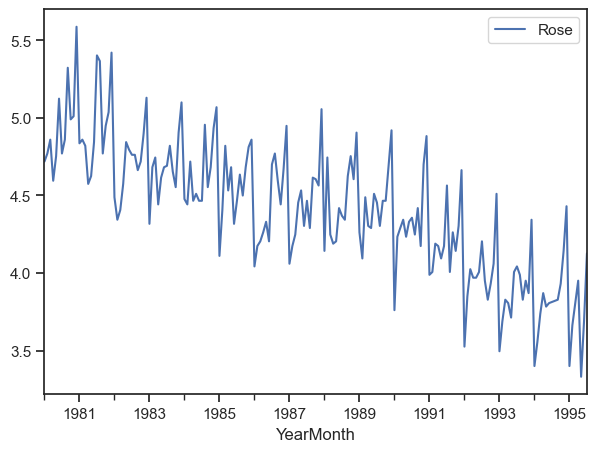

In [48]:
#Visualize the log transformed series
df_log.plot()
plt.show()


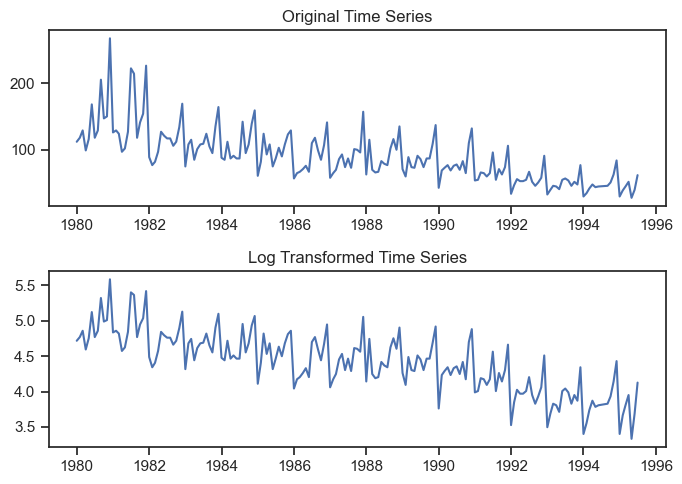

In [49]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

## Q.3 Split the data into training and test. The test data should start in 1991.

In [50]:
train = df[df.index<'1991'] 
test = df[df.index>='1991']

In [51]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [52]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



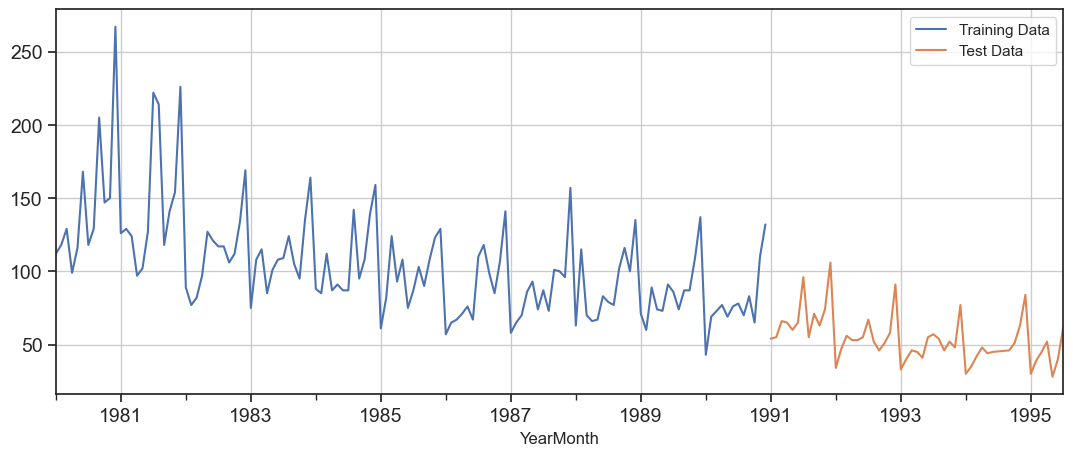

In [53]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Q.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.



*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [54]:
SES_train = train.copy()
SES_test = test.copy()

In [55]:
# create class
model_SES = SimpleExpSmoothing(SES_train,initialization_method='estimated')

In [56]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [57]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [58]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(SES_test))
SES_predict

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

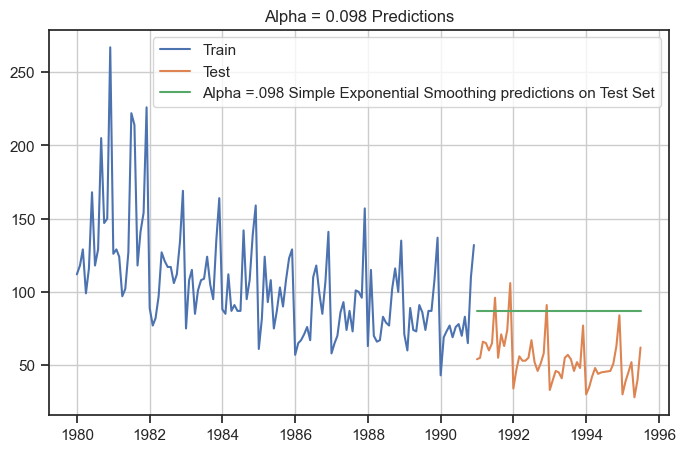

In [59]:
## Plotting the Training data, Test data and the forecasted values
plt.figure(figsize=(8, 5))  # Set the figure size

plt.plot(SES_train, label='Train')
plt.plot(SES_test, label='Test')

plt.plot(SES_predict, label='Alpha =.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

In [60]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [61]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.79624054770398
SES RMSE (calculated using statsmodels): 36.796240547703974


In [62]:
resultsDf_ses = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.098,SES'])
resultsDf_ses

,Test RMSE
"Alpha=0.098,SES",36.796241


## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [63]:
DES_train = train.copy()
DES_test = test.copy()

In [64]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [65]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(DES_test))
DES_predict

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

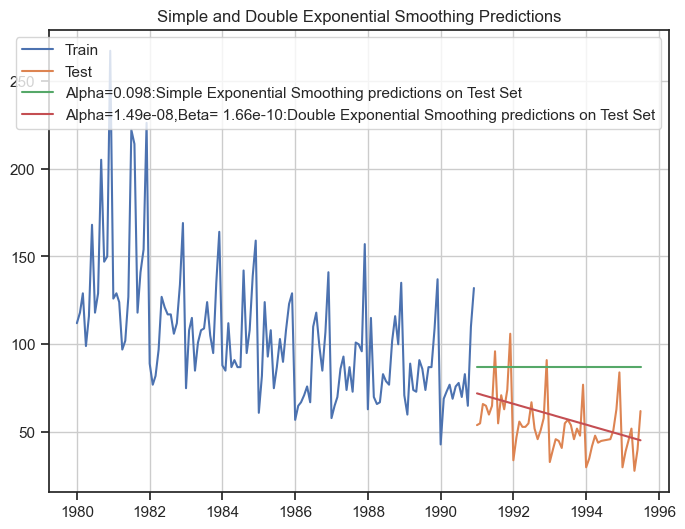

In [66]:
## Plotting the Training data, Test data and the forecasted values

# Plotting with figure size
plt.figure(figsize=(8, 6))


plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,Beta= 1.66e-10:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [67]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.268943764436564


In [68]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1.49e-08,Beta= 1.66e-10:DES'])

resultsDf_des = pd.concat([resultsDf_ses, resultsDf_temp])
resultsDf_des

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944


### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. 

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [69]:
TES_train = train.copy()
TES_test = test.copy()

In [70]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(TES_train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [71]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     42.684928
1991-02-01     54.564005
1991-03-01     61.995209
1991-04-01     50.852018
1991-05-01     59.034271
1991-06-01     63.850901
1991-07-01     73.190805
1991-08-01     78.724624
1991-09-01     74.276280
1991-10-01     71.895000
1991-11-01     89.444365
1991-12-01    131.042724
1992-01-01     36.119272
1992-02-01     47.998349
1992-03-01     55.429553
1992-04-01     44.286362
1992-05-01     52.468615
1992-06-01     57.285245
1992-07-01     66.625149
1992-08-01     72.158968
1992-09-01     67.710624
1992-10-01     65.329344
1992-11-01     82.878709
1992-12-01    124.477068
1993-01-01     29.553616
1993-02-01     41.432693
1993-03-01     48.863898
1993-04-01     37.720706
1993-05-01     45.902959
1993-06-01     50.719589
1993-07-01     60.059493
1993-08-01     65.593312
1993-09-01     61.144968
1993-10-01     58.763688
1993-11-01     76.313053
1993-12-01    117.911412
1994-01-01     22.987961
1994-02-01     34.867037
1994-03-01     42.298242
1994-04-01     31.155050


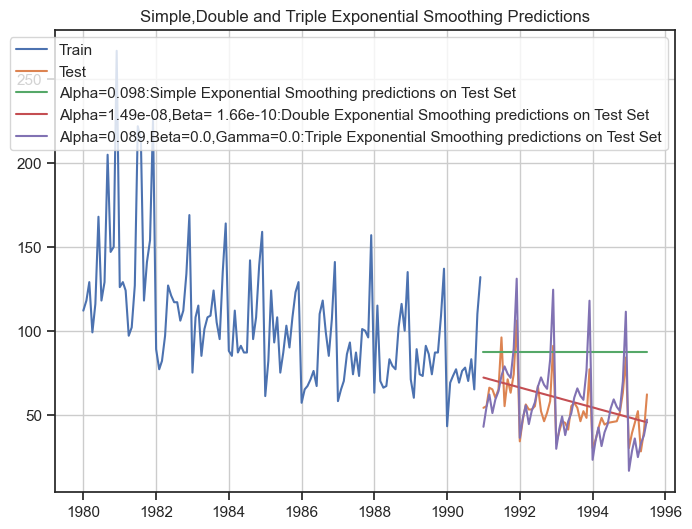

In [72]:
## Plotting the Training data, Test data and the forecasted values

# Plotting with figure size
plt.figure(figsize=(8, 6))


plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49e-08,Beta= 1.66e-10:Double Exponential Smoothing predictions on Test Set')


plt.plot(TES_predict, label='Alpha=0.089,Beta=0.0,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [73]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.249660750768982


In [74]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.089,Beta=0.0,Gamma=0.0:TES'])

resultsDf_tes = pd.concat([resultsDf_des, resultsDf_temp])
resultsDf_tes

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661


## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - Rose

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [75]:
TESM_train = train.copy()
TESM_test = test.copy()

Multiplicative Seasonality Train RMSE: 18.40633717457507
Multiplicative Seasonality Test RMSE: 20.156762582665337
Alpha (smoothing_level): 0.0715106306609405
Beta (smoothing_slope): 0.0
Gamma (smoothing_seasonal): 7.244325029450242e-05


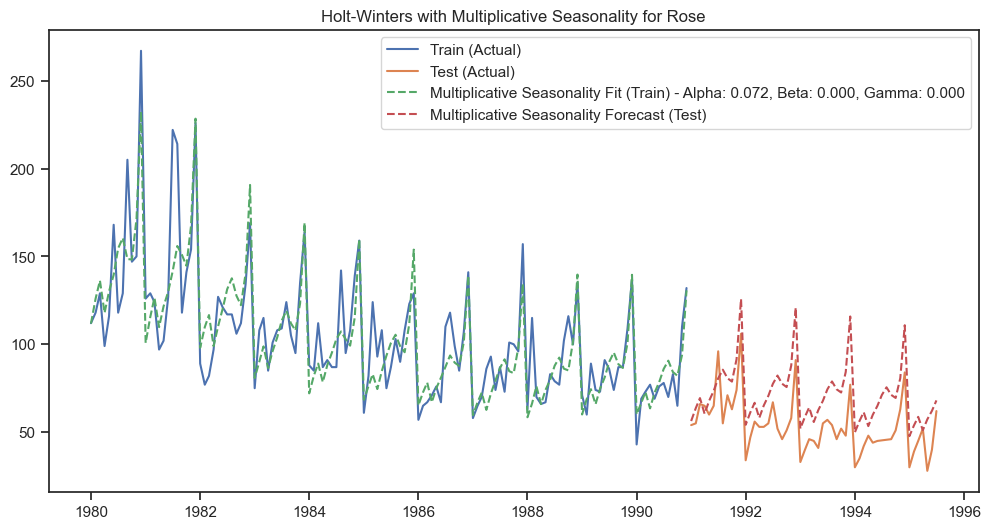

In [76]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming TESM_train and TESM_test are your training and testing DataFrames
# Make sure to replace 'Rose' with the actual column name in your DataFrames

# Function to fit Holt-Winters model with multiplicative seasonality
def fit_multiplicative_seasonality(data):
    model = ExponentialSmoothing(data, trend='add', seasonal='multiplicative', seasonal_periods=12)
    model_fit = model.fit()
    return model_fit

# Fit the model with multiplicative seasonality using training data
model_multiplicative = fit_multiplicative_seasonality(TESM_train['Rose'])

# Extract alpha, beta, and gamma values
alpha = model_multiplicative.params['smoothing_level']
beta = model_multiplicative.params.get('smoothing_slope', 0.0)  # Use get to handle the case where 'smoothing_slope' is not present
gamma = model_multiplicative.params['smoothing_seasonal']

# Forecasting for future time points on the testing data
forecast_multiplicative = model_multiplicative.forecast(steps=len(TESM_test))

# Calculate RMSE
rmse_multiplicative_train = np.sqrt(mean_squared_error(TESM_train['Rose'], model_multiplicative.fittedvalues))
rmse_multiplicative_test = np.sqrt(mean_squared_error(TESM_test['Rose'], forecast_multiplicative))

# Print RMSE and parameter values
print(f"Multiplicative Seasonality Train RMSE: {rmse_multiplicative_train}")
print(f"Multiplicative Seasonality Test RMSE: {rmse_multiplicative_test}")
print(f"Alpha (smoothing_level): {alpha}")
print(f"Beta (smoothing_slope): {beta}")
print(f"Gamma (smoothing_seasonal): {gamma}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(TESM_train['Rose'], label='Train (Actual)')
plt.plot(TESM_test['Rose'], label='Test (Actual)')
plt.plot(model_multiplicative.fittedvalues, label=f'Multiplicative Seasonality Fit (Train) - Alpha: {alpha:.3f}, Beta: {beta:.3f}, Gamma: {gamma:.3f}', linestyle='--')
plt.plot(forecast_multiplicative, label='Multiplicative Seasonality Forecast (Test)', linestyle='--')
plt.legend()
plt.title('Holt-Winters with Multiplicative Seasonality for Rose')
plt.show()


In [77]:
print('TES_mul RMSE:',mean_squared_error(TESM_test.values,forecast_multiplicative.values,squared=False))

TES_mul RMSE: 20.156762582665337


In [78]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(TESM_test.values,forecast_multiplicative.values,squared=False)]}
                           ,index=['Alpha=0.07,Beta=0.0,Gamma=0.0:TES'])

resultsDf_tes = pd.concat([resultsDf_tes, resultsDf_temp])
resultsDf_tes

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661
"Alpha=0.07,Beta=0.0,Gamma=0.0:TES",20.156763


### Model : Linear Regression

In [79]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
train_time = [i+1 for i in range(len(LinearRegression_train))]
test_time = [i+133 for i in range(len(LinearRegression_test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [82]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


Last few rows of Training Data


,Rose,time
YearMonth,,
1990-08-01,70.0,128
1990-09-01,83.0,129
1990-10-01,65.0,130
1990-11-01,110.0,131
1990-12-01,132.0,132


First few rows of Test Data


,Rose,time
YearMonth,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


Last few rows of Test Data


,Rose,time
YearMonth,,
1995-03-01,45.0,183
1995-04-01,52.0,184
1995-05-01,28.0,185
1995-06-01,40.0,186
1995-07-01,62.0,187


In [83]:
lr = LinearRegression()

In [84]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

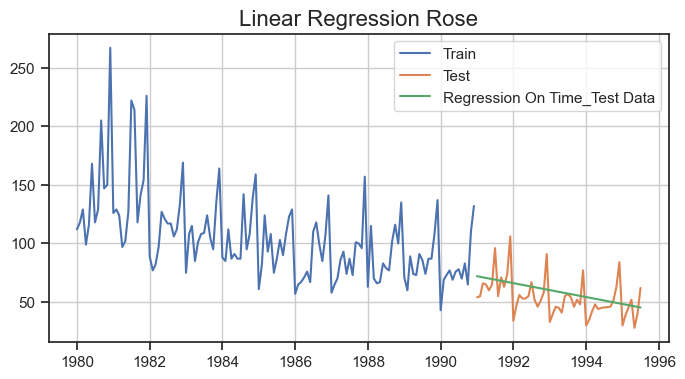

In [85]:
plt.figure(figsize=(8, 4))
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Rose', fontsize=16)
plt.grid();


In [86]:
from sklearn import metrics
rmse_model12_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [87]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model12_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.268955


In [88]:
resultsDf = pd.concat([resultsDf_tes, resultsDf])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661
"Alpha=0.07,Beta=0.0,Gamma=0.0:TES",20.156763
RegressionOnTime,15.268955


## Model 2: Naive Approach Rose : $\hat{y}_{t+1} = y_t$

In [89]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [90]:
NaiveModel_test['naive'] = np.asarray(NaiveModel_train['Rose'])[len(np.asarray(NaiveModel_train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

In [91]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Generate Naive Forecasts for Rose
NaiveModel_test['naive'] = np.asarray(NaiveModel_train['Rose'])[len(np.asarray(NaiveModel_train['Rose']))-1]

# Step 2: Calculate Residuals for Rose
residuals_rose = NaiveModel_test['Rose'] - NaiveModel_test['naive']

# Step 3: Compute RMSE for Rose
rmse_naive_rose = np.sqrt(mean_squared_error(NaiveModel_test['Rose'], NaiveModel_test['naive']))

# Print RMSE for Rose
print("RMSE for Naive Model (Rose):", rmse_naive_rose)


RMSE for Naive Model (Rose): 79.71877337417347


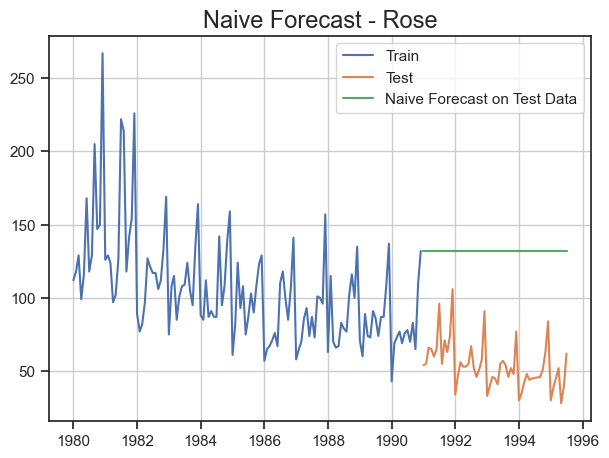

In [92]:
plt.figure(figsize=(7, 5))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(NaiveModel_test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();


## Model Evaluation

In [93]:
rmse_model21_test = metrics.mean_squared_error(NaiveModel_test['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [94]:
resultsDf_naive = pd.DataFrame({'Test RMSE': [rmse_model21_test]},index=['NaiveModel'])

In [95]:
resultsDf=pd.concat([resultsDf,resultsDf_naive])

In [96]:
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661
"Alpha=0.07,Beta=0.0,Gamma=0.0:TES",20.156763
RegressionOnTime,15.268955
NaiveModel,79.718773


##  Moving Average(MA)

In [215]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [216]:
#Trailing moving averages

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


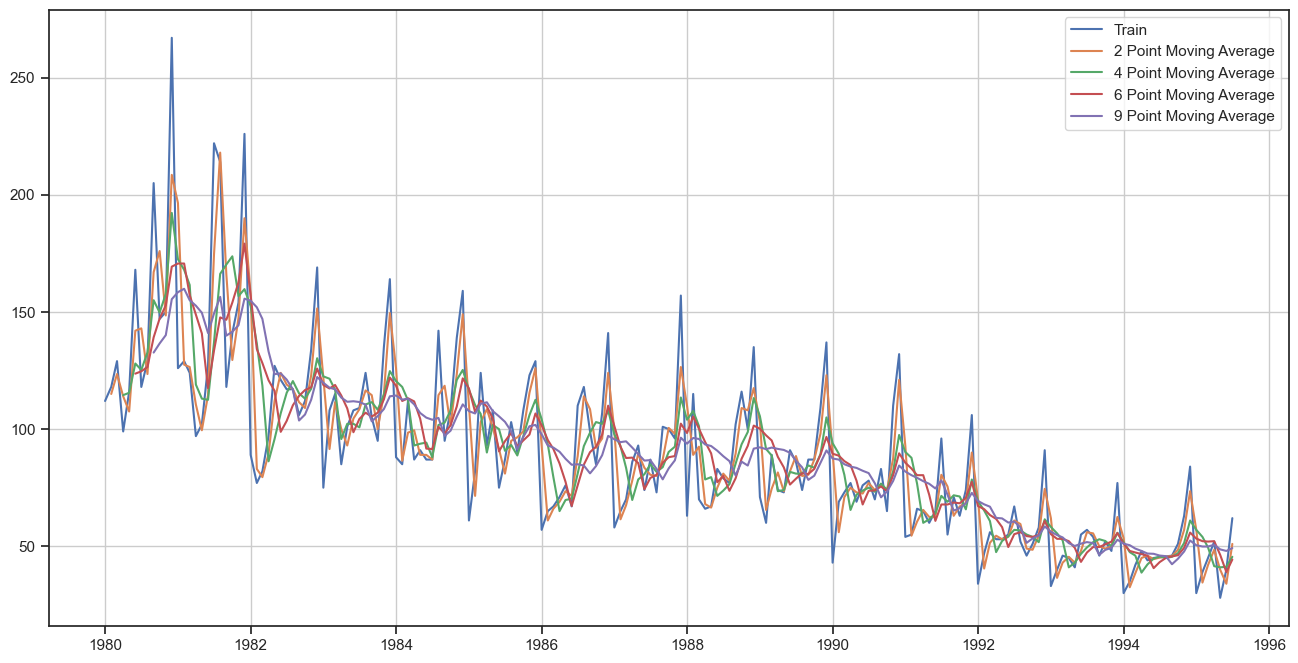

In [217]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [218]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

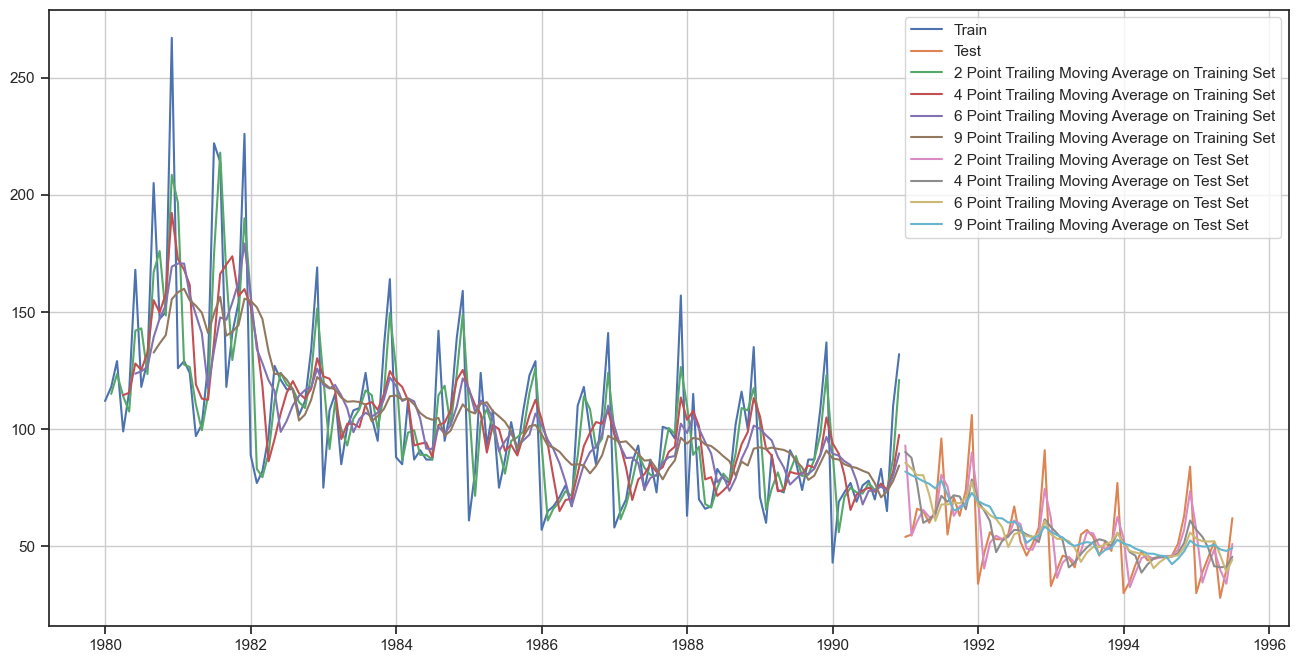

In [219]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [222]:
resultsDf_42 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

In [104]:
resultsDf=pd.concat([resultsDf,resultsDf_42])

In [105]:
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661
"Alpha=0.07,Beta=0.0,Gamma=0.0:TES",20.156763
RegressionOnTime,15.268955
NaiveModel,79.718773
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


##  Simple Average Model

In [106]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

RMSE for Simple Average Model on Test Data: 53.461


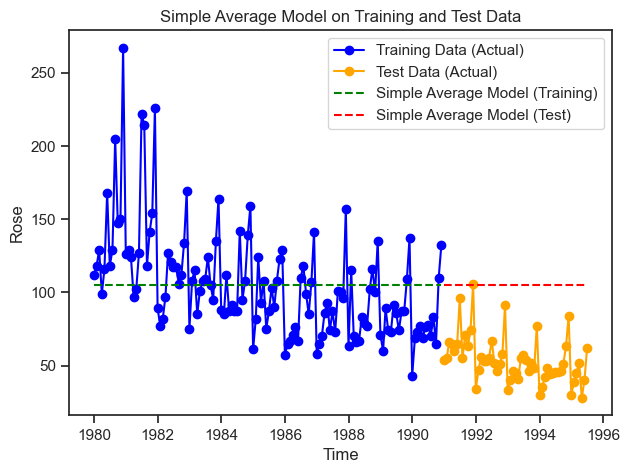

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'train' and 'test' are defined DataFrames
# Assuming 'df' is your DataFrame with a column 'Rose' representing the time series

# Calculate the simple average for the training set
simple_average_train = train['Rose'].mean()

# Create a DataFrame for the simple average predictions on the training set
simple_average_train_predictions = pd.Series([simple_average_train] * len(train), index=train.index)

# Calculate the simple average for the test set
simple_average_test = train['Rose'].mean()

# Create a DataFrame for the simple average predictions on the test set
simple_average_test_predictions = pd.Series([simple_average_test] * len(test), index=test.index)

# Calculate RMSE for the test set
rmse_simple_average = np.sqrt(mean_squared_error(test['Rose'], simple_average_test_predictions))

# Print RMSE for the simple average model on the test set
print(f"RMSE for Simple Average Model on Test Data: {rmse_simple_average:.3f}")

# Plotting
plt.figure(figsize=(7, 5))

# Plot actual values on training and test sets
plt.plot(train['Rose'], label='Training Data (Actual)', marker='o', color='blue')
plt.plot(test['Rose'], label='Test Data (Actual)', marker='o', color='orange')

# Plot simple average forecasts on training set
plt.plot(simple_average_train_predictions, label='Simple Average Model (Training)', linestyle='--', color='green')

# Plot simple average forecasts on test set
plt.plot(simple_average_test_predictions, label='Simple Average Model (Test)', linestyle='--', color='red')

plt.title('Simple Average Model on Training and Test Data')
plt.xlabel('Time')
plt.ylabel('Rose')
plt.legend()
plt.show()


In [108]:
resultsDf_32 = pd.DataFrame({'Test RMSE': [rmse_simple_average]}
                           ,index=['SimpleAverageModel'])

In [109]:
resultsDf=pd.concat([resultsDf,resultsDf_32])

In [110]:
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661
"Alpha=0.07,Beta=0.0,Gamma=0.0:TES",20.156763
RegressionOnTime,15.268955
NaiveModel,79.718773
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


## Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.

Null Hypothesis  𝐻0
 : Time Series is non-stationary.
Alternate Hypothesis  𝑯𝒂
 : Time Series is stationary.
So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .

In [111]:
from statsmodels.tsa.stattools import adfuller

In [112]:
dftest = adfuller(df['Rose'])#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.877
DF test p-value is 0.3431


Differencing 'd'for making series stationary


1st order differencing equation is :  𝒚𝒕=𝒚𝒕−𝒚𝒕−1

Differenced Data:
YearMonth
1980-02-01     6.0
1980-03-01    11.0
1980-04-01   -30.0
1980-05-01    17.0
1980-06-01    52.0
Name: Rose, dtype: float64


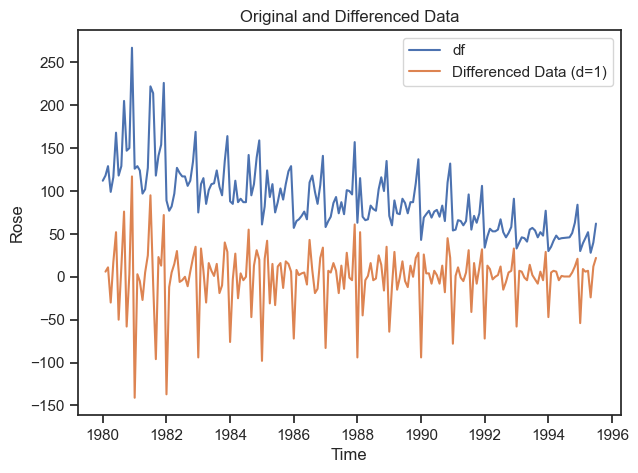

In [113]:
# Perform differencing (d=1)
differenced_data = df['Rose'].diff().dropna()

# Display the first few rows of the differenced data
print("Differenced Data:")
print(differenced_data.head())

# Plot the original and differenced data for visualization

plt.figure(figsize=(7, 5))
plt.plot(df['Rose'], label='df')
plt.plot(differenced_data, label='Differenced Data (d=1)')
plt.legend()
plt.title('Original and Differenced Data')
plt.xlabel('Time')
plt.ylabel('Rose')
plt.show()


In [114]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'differenced_data' is the differenced time series data
# Replace 'column_name' with the actual column name if your data is in a DataFrame

# Function to perform Dickey-Fuller test
def perform_adf_test(data):
    result = adfuller(data, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Perform Dickey-Fuller test on the differenced data
print("Dickey-Fuller Test Results for Differenced Data:")
perform_adf_test(differenced_data)


Dickey-Fuller Test Results for Differenced Data:
ADF Statistic: -8.044392160323268
p-value: 1.8108946830815407e-12
Critical Values: {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}


The Dickey-Fuller test strongly suggests that the differenced data is now stationary, as evidenced by the significantly negative ADF Statistic, a very low p-value, and critical values consistent with stationarity.

In [115]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

In [116]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)


In [117]:
import itertools
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [118]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [119]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [120]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [121]:
train = differenced_data[differenced_data.index<'1991'] 
test = differenced_data[differenced_data.index>='1991']

In [122]:
Arima_train = train.copy()
Arima_test = test.copy()

ARIMA Model building to estimate best 'p' , 'd' , 'q' paramters ( Lowest AIC Approach )

In [123]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [124]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Arima_train,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:1277.7757502490272
ARIMA(1, 0, 2) - AIC:1277.3592499800302
ARIMA(1, 0, 3) - AIC:1279.312637585404
ARIMA(1, 1, 1) - AIC:1315.7930868248516
ARIMA(1, 1, 2) - AIC:1278.0510112228253
ARIMA(1, 1, 3) - AIC:1284.8180031009117
ARIMA(2, 0, 1) - AIC:1279.0456933309424
ARIMA(2, 0, 2) - AIC:1279.2986973990824
ARIMA(2, 0, 3) - AIC:1272.409476992529
ARIMA(2, 1, 1) - AIC:1297.8603329219734
ARIMA(2, 1, 2) - AIC:1279.366488574682
ARIMA(2, 1, 3) - AIC:1288.6169909725331
ARIMA(3, 0, 1) - AIC:1279.6138950630443
ARIMA(3, 0, 2) - AIC:1280.9692934355921
ARIMA(3, 0, 3) - AIC:1273.9089388891412
ARIMA(3, 1, 1) - AIC:1297.0354183461395
ARIMA(3, 1, 2) - AIC:1297.6219379919903
ARIMA(3, 1, 3) - AIC:1281.2175023100963


In [125]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(2, 0, 3)",1272.409477
14,"(3, 0, 3)",1273.908939
1,"(1, 0, 2)",1277.359250
0,"(1, 0, 1)",1277.775750
4,"(1, 1, 2)",1278.051011


Building ARIMA model with best parameters p,d,q

In [126]:
best_model = ARIMA(Arima_train,order = (2,0,3))
best_results = best_model.fit()

In [127]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  131
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -629.205
Date:                Sun, 28 Jan 2024   AIC                           1272.409
Time:                        10:17:50   BIC                           1292.536
Sample:                    02-01-1980   HQIC                          1280.588
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4949      0.132     -3.751      0.000      -0.754      -0.236
ar.L1         -1.6663      0.087    -19.093      0.000      -1.837      -1.495
ar.L2         -0.7167      0.086     -8.346      0.0

Calculating RMSE for best ARIMA model

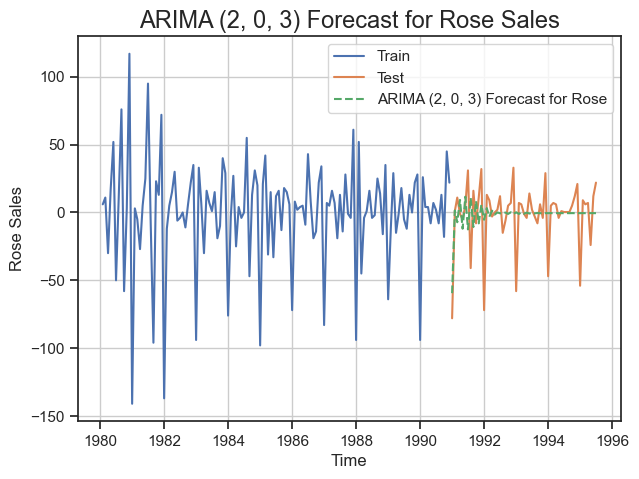

RMSE for ARIMA (2, 0, 3) on Test Data (Rose): 21.643


In [128]:
# Fit the ARIMA model for Rose sales with order (2, 0, 3)
arima_order_rose = (2, 0, 3)
arima_model_rose = ARIMA(Arima_train, order=arima_order_rose)
best_results_rose = arima_model_rose.fit()

# Forecast using the ARIMA (2, 0, 3) model for Rose sales
predicted_auto_ARIMA_rose = best_results_rose.forecast(steps=len(Arima_test))

# Plotting the Training data, Test data, and the forecasted values for Rose sales
plt.figure(figsize=(7, 5))
plt.plot(Arima_train, label='Train')
plt.plot(Arima_test, label='Test')
plt.plot(predicted_auto_ARIMA_rose, label='ARIMA (2, 0, 3) Forecast for Rose', linestyle='--')

plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 0, 3) Forecast for Rose Sales', fontsize=17)
plt.xlabel('Time')
plt.ylabel('Rose Sales')
plt.show()

# Calculate RMSE for Rose sales with ARIMA (2, 0, 3)
rmse_rose = mean_squared_error(Arima_test, predicted_auto_ARIMA_rose, squared=False)
print(f"RMSE for ARIMA (2, 0, 3) on Test Data (Rose): {rmse_rose:.3f}")


In [129]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse_rose,}
                           ,index=['ARIMA(2,0,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661
"Alpha=0.07,Beta=0.0,Gamma=0.0:TES",20.156763
RegressionOnTime,15.268955
NaiveModel,79.718773
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


## SARIMA Model

Finding Seasonality = 12 from ACF/PACF plots 

In [130]:
Sarima_train = train.copy()
Sarima_test = test.copy()

In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

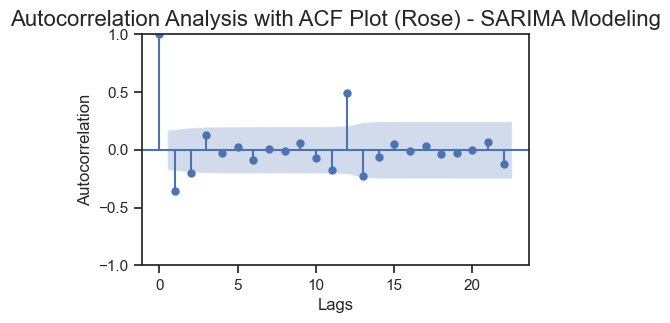

In [132]:
# Plotting the ACF with confidence interval bands
plt.figure(figsize=(5, 3))
plot_acf(Sarima_train, alpha=0.05, ax=plt.gca())

# Adding title and labels
plt.title('Autocorrelation Analysis with ACF Plot (Rose) - SARIMA Modeling', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

# Display the plot
plt.show()


SARIMA Model building to estimate best parameters 

In [133]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [134]:
import statsmodels.api as sm
from joblib import Parallel, delayed

def fit_sarima(param, param_seasonal, Sarima_train, Sarima_test):
    SARIMA_model = sm.tsa.statespace.SARIMAX(Sarima_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
    

    results_SARIMA = SARIMA_model.fit(maxiter=1000)
    
    # Additional steps for forecasting and calculating RMSE
    start_date = Sarima_test.index[0] 
    pred_dynamic = results_SARIMA.get_prediction(start=pd.to_datetime(start_date), dynamic=True, full_results=True)
    pred99 = results_SARIMA.get_forecast(steps=len(Sarima_test), alpha=0.1)
    Sarima_Values_forecasted = pred99.predicted_mean
    mse = ((Sarima_test - Sarima_Values_forecasted) ** 2).mean()
    rmse = np.sqrt(mse)
    print('SARIMA{}x{} - AIC:{} - RMSE:{}'.format(param, param_seasonal, results_SARIMA.aic, rmse))
    return {'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic, 'RMSE': rmse}

# Define the parameter grids
param_grid = [(param, param_seasonal, Sarima_train, Sarima_test) for param in pdq for param_seasonal in seasonal_pdq]

# Use parallel processing to fit SARIMA models
results = Parallel(n_jobs=-1)(delayed(fit_sarima)(*params) for params in param_grid)
# Create a DataFrame from the results
SARIMA_AIC = pd.DataFrame(results)

In [135]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head(5)

,param,seasonal,AIC,RMSE
23,"(1, 0, 2)","(1, 1, 3, 12)",16.0,1.761145e+71
113,"(2, 0, 1)","(1, 1, 3, 12)",16.0,3.149210e+70
167,"(2, 1, 1)","(1, 1, 3, 12)",16.0,3.191274e+60
131,"(2, 0, 2)","(1, 1, 3, 12)",18.0,1.579176e+105
17,"(1, 0, 1)","(3, 1, 3, 12)",18.0,2.161483e+116


In [136]:
SARIMA_AIC.sort_values(by=['RMSE'],ascending=True).head(5)

,param,seasonal,AIC,RMSE
282,"(3, 1, 1)","(3, 0, 1, 12)",795.696044,10.225595
228,"(3, 0, 1)","(3, 0, 1, 12)",774.747304,10.254311
246,"(3, 0, 2)","(3, 0, 1, 12)",776.626686,10.267572
283,"(3, 1, 1)","(3, 0, 2, 12)",795.007653,10.288908
300,"(3, 1, 2)","(3, 0, 1, 12)",780.210199,10.300855


Building SARIMA model with the best parameters 

In [137]:
best_model_sarima= sm.tsa.statespace.SARIMAX(Sarima_train,
                                      order=(3, 1, 1),
                                      seasonal_order=(3, 0,1, 12),
                                      enforce_stationarity=False,
                                        enforce_invertibility=False)
best_results_sarima= best_model_sarima.fit()


In [138]:
print(best_results_sarima.summary().tables[0])
print(best_results_sarima.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  131
Model:             SARIMAX(3, 1, 1)x(3, 0, 1, 12)   Log Likelihood                -388.848
Date:                            Sun, 28 Jan 2024   AIC                            795.696
Time:                                    10:37:59   BIC                            818.294
Sample:                                02-01-1980   HQIC                           804.813
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6353      0.124     -5.124      0.000      -0.878      -0.392
ar.L2         -0.3984      0.161   

In [139]:
start_date = Sarima_test.index[0] 
pred_dynamic = best_results_sarima.get_prediction(start=pd.to_datetime(start_date), dynamic=True, full_results=True)


In [140]:
pred99 = best_results_sarima.get_forecast(steps=len( Sarima_test), alpha=0.1)#forecasting values 

In [141]:
# Extract the predicted and true values of our time series
Sarima_Values_forecasted = pred99.predicted_mean


In [142]:
# Compute the root mean square error
mse = ((Sarima_test- Sarima_Values_forecasted) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))


The Root Mean Squared Error of our forecasts is 10.226


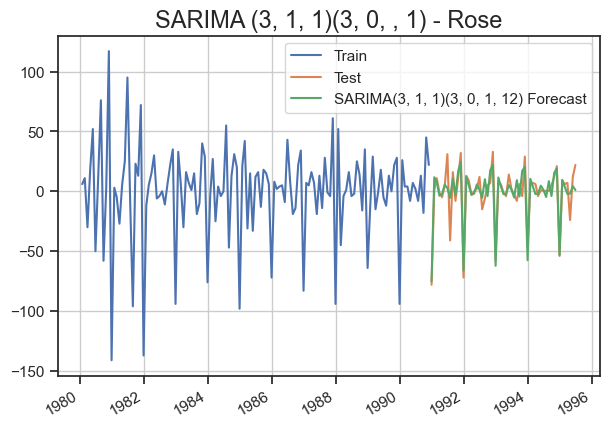

In [200]:
plt.plot(Sarima_train, label='Train')
plt.plot(Sarima_test, label='Test')
pred99.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 1, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1)(3, 0, , 1) - Rose', fontsize=17);


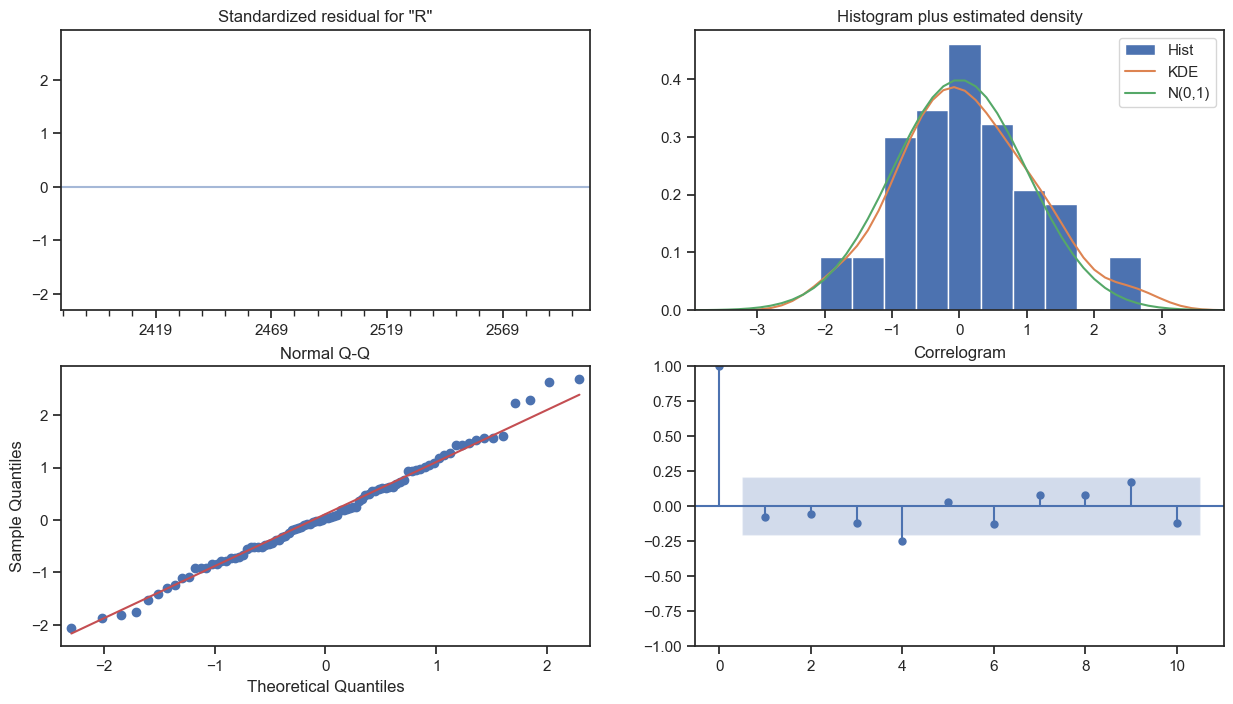

In [144]:
# Plot diagnostics
best_results_sarima.plot_diagnostics(figsize=(15, 8))
plt.show()

In [145]:
temp_resultsDf_Sarima = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(3,1,1)(3,0,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_Sarima])

resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661
"Alpha=0.07,Beta=0.0,Gamma=0.0:TES",20.156763
RegressionOnTime,15.268955
NaiveModel,79.718773
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


## Q.8 Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [146]:
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796241
"Alpha=1.49e-08,Beta= 1.66e-10:DES",15.268944
"Alpha=0.089,Beta=0.0,Gamma=0.0:TES",14.249661
"Alpha=0.07,Beta=0.0,Gamma=0.0:TES",20.156763
RegressionOnTime,15.268955
NaiveModel,79.718773
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


In [147]:
resultsDf.to_csv('Rose_results.csv')

## Q.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [148]:
model_TES_full = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='additive',initialization_method='estimated')
results_full_data_model = model_TES_full.fit()
print(results_full_data_model.params)

{'smoothing_level': 0.09623105607316472, 'smoothing_trend': 0.007090440762370349, 'smoothing_seasonal': 0.003451514779158787, 'damping_trend': nan, 'initial_level': 146.22170986283172, 'initial_trend': -0.5635821299809678, 'initial_seasons': array([-28.08544482, -17.1164866 ,  -8.96191709, -15.74055276,
       -11.83907447,  -5.7213814 ,   5.36590498,   5.29087572,
         2.66576186,   1.95435652,  17.09912238,  55.963095  ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [149]:
TES_predict_full =  results_full_data_model.forecast(steps=12)
TES_predict_full
prediction_1 = TES_predict_full

In [150]:
# Forecasting using this model for the duration of the test set
TES_predict =  results_full_data_model.forecast(len(df))
TES_predict
print('TES RMSE:',mean_squared_error(df.values,TES_predict.values,squared=False))

TES RMSE: 100.30430325387114


In [151]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(results_full_data_model.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(results_full_data_model.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,14.903234,49.772739,84.642245
1995-09-01,11.764820,46.634326,81.503831
1995-10-01,10.536511,45.406017,80.275522
1995-11-01,25.159118,60.028624,94.898129
1995-12-01,63.491114,98.360619,133.230125


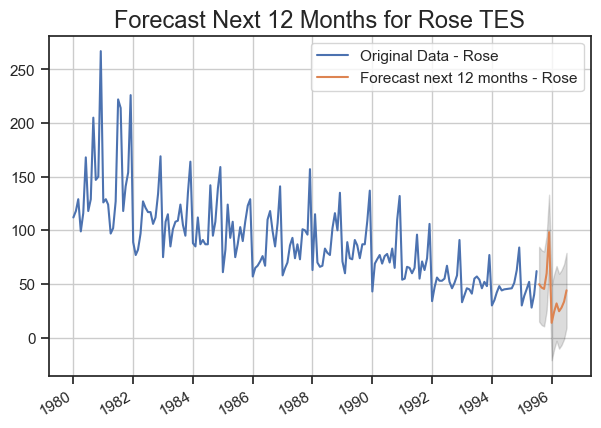

In [152]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(df['Rose'], label='Original Data - Rose')

ax =TES_predict_full.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose TES', fontsize=17);



In [201]:
full_data_model = sm.tsa.statespace.SARIMAX(differenced_data,
                                order=(3,1,1),
                                seasonal_order=(3,0,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  186
Model:             SARIMAX(3, 1, 1)x(3, 0, 1, 12)   Log Likelihood                -597.161
Date:                            Sun, 28 Jan 2024   AIC                           1212.322
Time:                                    17:25:45   BIC                           1239.175
Sample:                                02-01-1980   HQIC                          1223.233
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6419      0.088     -7.329      0.000      -0.814      -0.470
ar.L2         -0.4065      0.111   

In [202]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [203]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()
rmse = mean_squared_error(differenced_data,results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.66249461947711


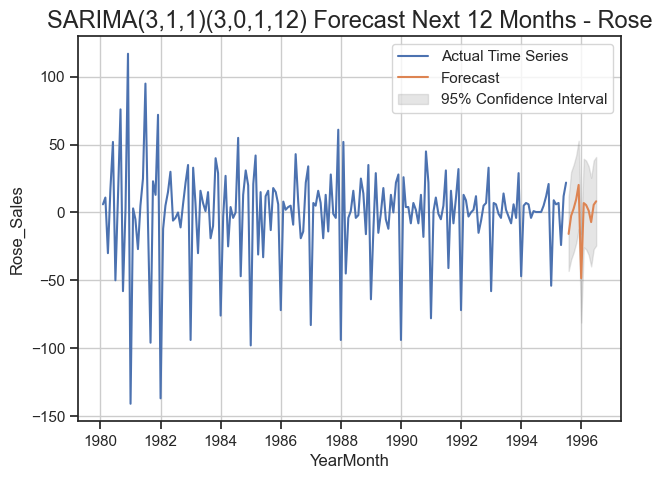

In [208]:
plt.plot(differenced_data, label='Actual Time Series')
plt.plot(pred_full_manual_SARIMA_date['mean'], label='Forecast')
plt.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], pred_full_manual_SARIMA_date['mean_ci_upper'], color='gray', alpha=0.2, label='95% Confidence Interval')


plt.xlabel('YearMonth')
plt.ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(3,1,1)(3,0,1,12) Forecast Next 12 Months - Rose', fontsize=17);
figsize=(12, 8)

In [205]:
# Forecasting
forecast_horizon = 12
forecast_sarima = results_full_data_model.get_forecast(steps=forecast_horizon)

# Confidence Intervals Calculation
pred_sarima_df = pd.DataFrame({
    'lower_CI': forecast_sarima.conf_int().iloc[:, 0],
    'prediction': forecast_sarima.predicted_mean,
    'upper_CI': forecast_sarima.conf_int().iloc[:, 1]
})

# Print the prediction and confidence intervals
print(pred_sarima_df)


             lower_CI  prediction   upper_CI
1995-08-01 -43.112750  -15.801651  11.509447
1995-09-01 -34.688706   -2.373450  29.941807
1995-10-01 -29.515647    2.800393  35.116433
1995-11-01 -22.616498    9.704581  42.025661
1995-12-01 -12.265557   20.292820  52.851197
1996-01-01 -81.105346  -48.446976 -15.788606
1996-02-01 -25.712722    6.945876  39.604474
1996-03-01 -27.181648    5.477726  38.137100
1996-04-01 -31.329424    1.336203  34.001831
1996-05-01 -39.766367   -7.099720  25.566927
1996-06-01 -27.039628    5.627067  38.293761
1996-07-01 -24.408829    8.257988  40.924805


In [207]:
pred_sarima_df.to_csv('Rose_Prediction_sarima.csv')